### Analysis of Frequency of behavior changes

#### Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('FED000_071123_06.CSV')
data_droped = df[['MM:DD:YYYY hh:mm:ss', 'FR', 'Event', 'Active_Poke']].rename(
    columns={'MM:DD:YYYY hh:mm:ss': 'Time_Stamp'})


In [4]:
# replace all left-related tags to left and right-related tags to right
data_droped = data_droped.replace({'LeftWithPellet': 'Left', 'LeftDuringDispense': 'Left',
                                   'RightWithPellet': 'Right', 'RightDuringDispense': 'Right'})

# Check the placement is correct
print(data_droped['Event'].unique())
print(data_droped.head(10))


['Right' 'Left' 'Pellet']
          Time_Stamp  FR   Event Active_Poke
0  7/11/2023 9:00:03   1   Right        Left
1  7/11/2023 9:00:06   1    Left        Left
2  7/11/2023 9:04:12   1    Left        Left
3  7/11/2023 9:06:50   1   Right        Left
4  7/11/2023 9:06:51   1  Pellet        Left
5  7/11/2023 9:10:42   1    Left        Left
6  7/11/2023 9:10:45   1    Left        Left
7  7/11/2023 9:10:53   1    Left        Left
8  7/11/2023 9:11:06   1  Pellet        Left
9  7/11/2023 9:12:15   1    Left        Left


#### Graphing

In [5]:
# Convert Time_Stamp column to datetime format for processing
data_droped['Time_Stamp'] = pd.to_datetime(data_droped['Time_Stamp'])

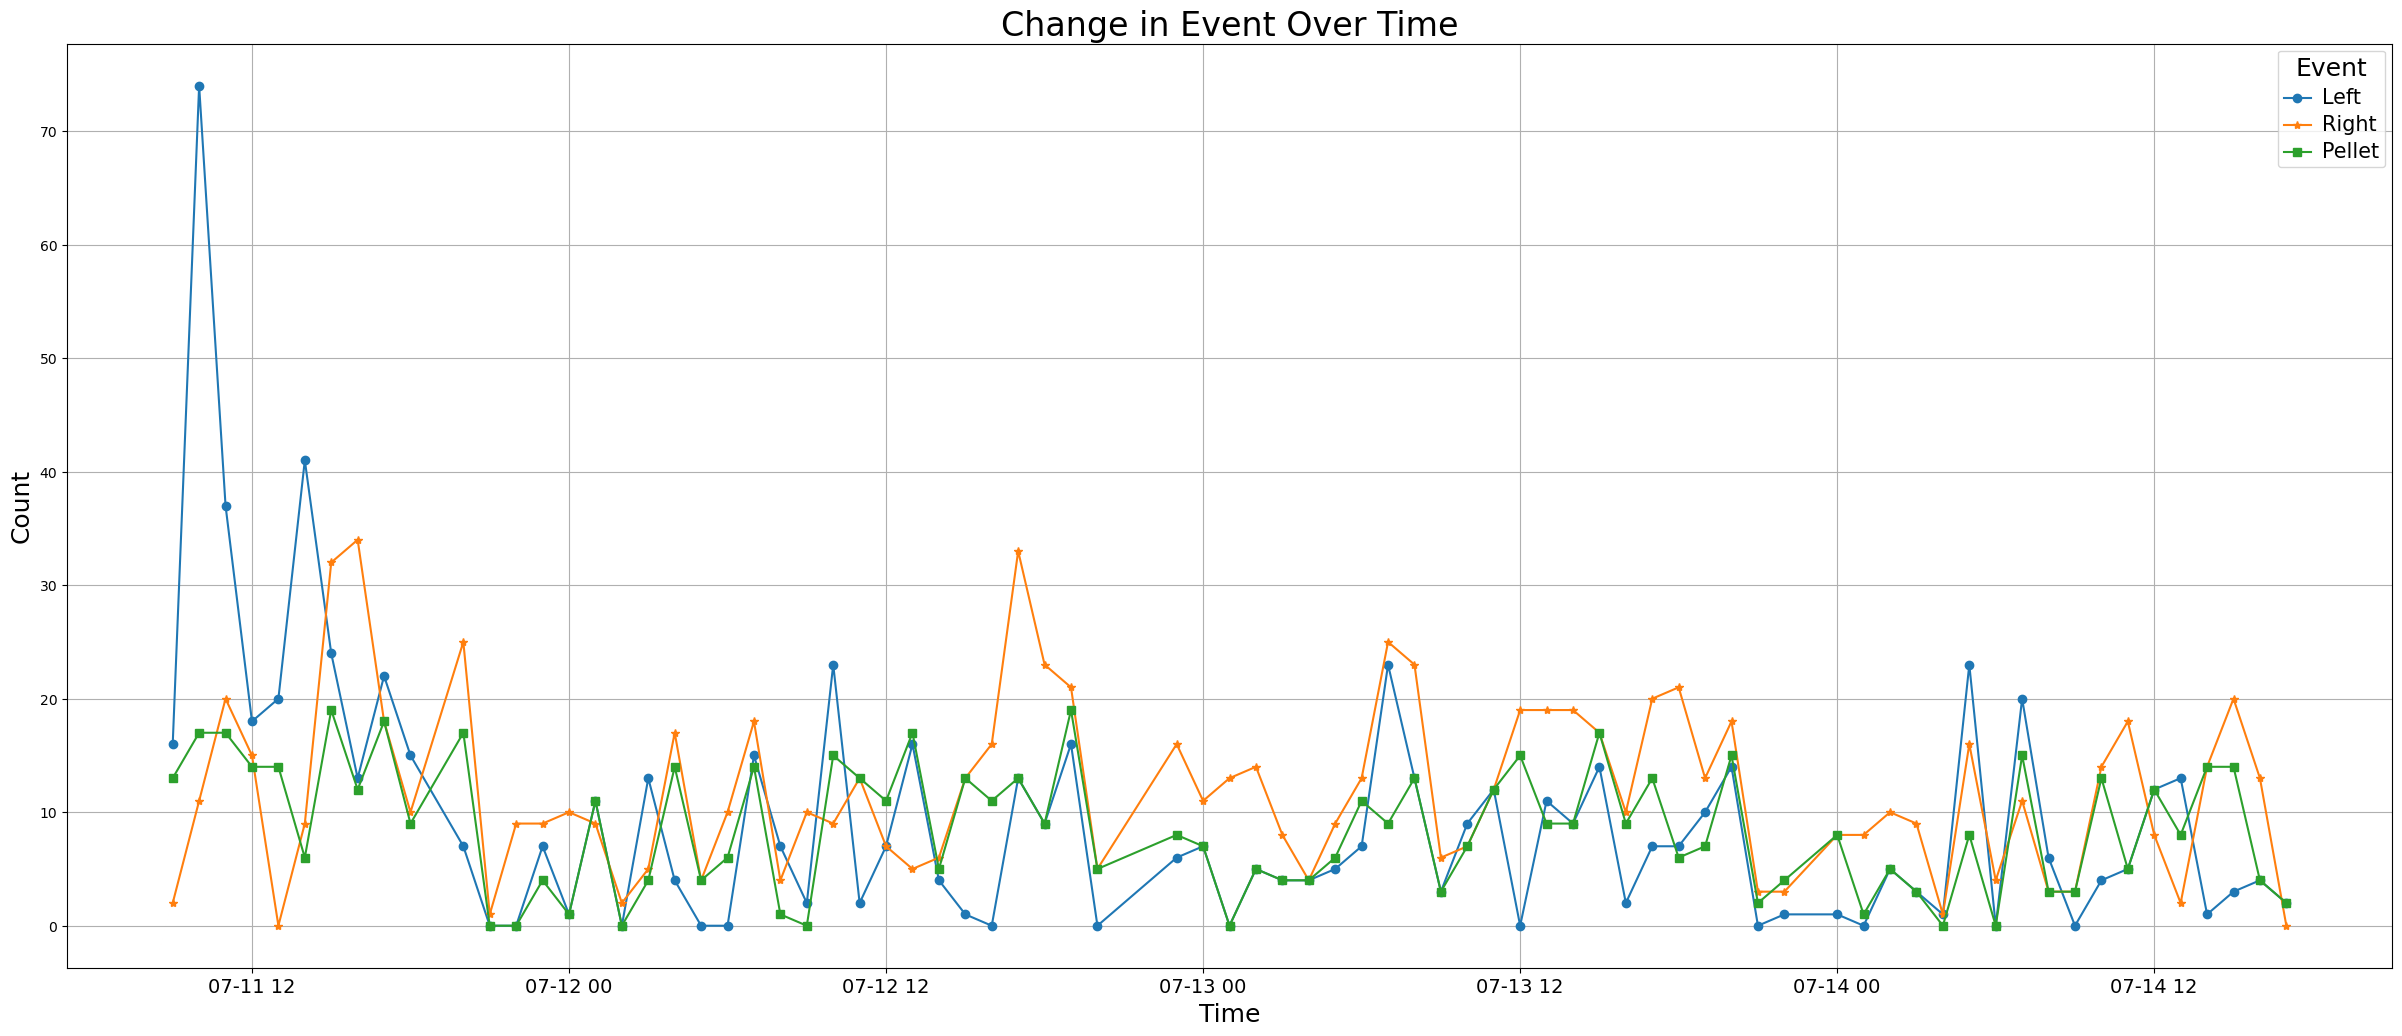

In [6]:
# Group data by 'Event' and resample time in 30-minute intervals
event_counts = data_droped.groupby(['Event', pd.Grouper(
    key='Time_Stamp', freq='H')]).size().reset_index(name='Count')

# Pivot the table to have 'Event' as columns
event_counts_pivot = event_counts.pivot(
    index='Time_Stamp', columns='Event', values='Count').fillna(0)

# Create a line chart
plt.figure(figsize=(30, 12))
plt.plot(event_counts_pivot.index,
         event_counts_pivot['Left'], marker='o', label='Left')
plt.plot(event_counts_pivot.index,
         event_counts_pivot['Right'], marker='*', label='Right')
plt.plot(event_counts_pivot.index,
         event_counts_pivot['Pellet'], marker='s', label='Pellet')

# Add labels and legend
plt.xlabel('Time', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Change in Event Over Time', fontsize=24)
legend = plt.legend(title='Event')
legend.get_title().set_fontsize('18')  # Adjust the legend title font size
legend.get_texts()[0].set_fontsize('15')
legend.get_texts()[1].set_fontsize('15')
legend.get_texts()[2].set_fontsize('15')

plt.xticks(fontsize=14)  # Adjust the font size as needed

# TODO: display background color

# Show the plot
plt.grid()
plt.show()
